In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from scipy.special import factorial as sfactorial
from copy import copy

**Problem 1**: 7 pts- Another very important class of special functions are called the _Legendre Polynomials_, say $L_{n}(x)$, which are defined for non-negative integer $n$ via the series

$$
L_{n}(x) = \sum_{k=0}^{n}\frac{(n+k)!}{(k!)^{2}(n-k)!}\left(\frac{x-1}{2}\right)^{k}, ~ -1\leq x \leq 1.
$$

Using a `for`-loop, vectorized, recursive approach, write a function which computes the Legendre functions for any non-negative integer $n$ (4pts).  Make a plot showing $L_{n}(x)$ for $n=0,1,2,3,4$ simultaneously, using different colors for each different $n$.  The plot should have a legend as well as appropriately labeled axes.  (3pts)    

_Answer to Problem 1_

In [4]:
def Legendre ( x, n ):
    xm1d2 = (x-1) / 2
    an = ( sfactorial (n + 1) * (xm1d2) ) / (sfactorial(n - 1))   
    Tn = np.ones(x.size) + an
    if n == 0:
        return np.ones(x.size)
    if n == 1:
        return Tn
    if n >= 2:
        for kk in range (2, n):
            an *= ( (n + kk) * (n - kk + 1) * (xm1d2) ) / (kk ** 2)
            Tn += an 
        return Tn

C:\Users\Stephen Giang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stephen Giang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$Legendre$')

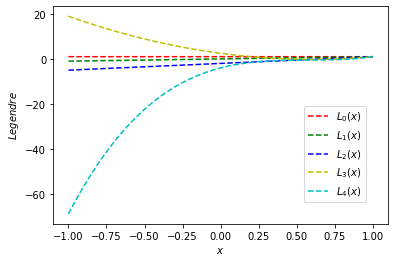

In [5]:
xvals = np.linspace(-1. , 1. , int(1e4))

y0 =  Legendre( xvals, 0)
y1 =  Legendre( xvals, 1)
y2 =  Legendre( xvals, 2)
y3 =  Legendre( xvals, 3)
y4 =  Legendre( xvals, 4)

plt.plot ( xvals , y0 , ls="--", color = 'r',  label = "$L_{0} (x) $")
plt.plot ( xvals , y1 , ls="--", color = 'g',  label = "$L_{1} (x) $")
plt.plot ( xvals , y2 , ls="--", color = 'b',  label = "$L_{2} (x) $")
plt.plot ( xvals , y3 , ls="--", color = 'y',  label = "$L_{3} (x) $")
plt.plot ( xvals , y4 , ls="--", color = 'c',  label = "$L_{4} (x) $")

plt.legend(loc=(.75 , .1))

plt.xlabel('$x$')
plt.ylabel('$Legendre$')

**Problem 2**: 5 pts - Using a for loop based approach, write a program which finds the function $f(n)$ where 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$

for any positive integer n (2pts).  Generate a labeled plot of the results of your function for $1\leq n \leq 1000$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph. (3pts)      

_Answer to Problem 2_

In [124]:
def fofn (n):
    tot = 0
    for jj in range (1, int(n)+1):
        jn5 = (jj/n)**5
        jn3 = (jj/n)**3
        tot += jn5 + (6*jn3)
    return tot/n

In [125]:
print (fofn(5))

2.4432


Text(0, 0.5, '$f (n) $')

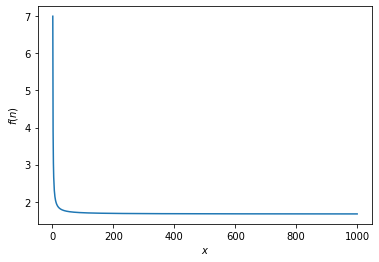

In [126]:
nvals = np.linspace(1,1000, 1000)

plt.plot ( nvals, [fofn (nval) for nval in nvals])

plt.xlabel('$x$')
plt.ylabel('$f (n) $')

As the limit approaches 0, the graph tends towards infinity. 
Whereas the limit approaches infinity, the graph approaches 0.
The graph is decreasing because of the (1/n) is making the graph decrease faster than the summation is making it increase.

**Problem 3**: 6 pts- Using a vectorized approach, which means no explicit for loops, write a program which finds 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$


for any positive integer n (3pts).  Using `time()`, run several different tests using different values of $n$ to determine how much faster your code is than that used in the previous problem.  For what value of $n$ do you finally see a significant difference in time?  Note, plots are far more preferable than just writing a particular number.  Build a case for your decision please. (3pts)    

_Answer to Problem 3_

In [127]:
def fofn_vec (n):    
    jvals = np.arange(1,int(n) + 1)
    jn5 = (jvals / n) ** 5
    jn3 = (jvals / n) ** 3
    tot = np.sum( jn5 + 6*jn3)
    return tot/n

In [128]:
print (fofn_vec(5))

2.4432


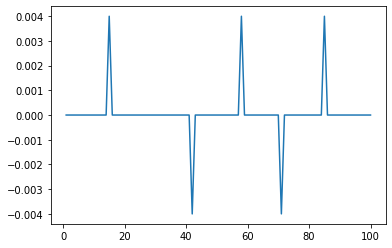

In [129]:
nvals = np.linspace(1,100, 100)

def runtimeFofn(n):
    start = time()
    fofn (n)
    end=time()
    runtime = end - start
    return runtime

def runtimeFofn_vec(n):
    start = time()
    fofn_vec (n)
    end=time()
    runtime = end - start
    return runtime

def runtimeFofn_diff(n):
    return runtimeFofn_vec(n) - runtimeFofn(n)

plt.plot(nvals, [runtimeFofn_diff(nval) for nval in nvals])

I plotted the Difference in times from my vec function to my nonvec function.  I can clearly see the difference in times and speeds.  Plotting it makes it easier than plugging in points 

**Problem 4**: We can generalize the Fibonacci sequence so that we have the recurrence relationship

$$
p_{n} = p_{n-1} + ap_{n-2}, ~ a \in \mathbb{R}, ~ n\geq 2,
$$

where we start the sequence $p_{n}$ with the initial conditions

$$
p_{0} = s_{0}, ~ p_{1} = s_{1}, ~ s_{j} \in \mathbb{R}.
$$

4a) (3pts) Using the guess $p_{n} = \lambda^{n}$, show that you get two solutions for $\lambda$, say $\lambda_{\pm}$, where

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
$$

4b) (3pts) Writing the general solution as 

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}
$$

show that when we take our initial conditions into account, we find that the constants $c_{+}$ and $c_{-}$ are given by 

$$
c_{+} = \frac{s_{1}-s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}}, ~ c_{-} = \frac{s_{0}\lambda_{+}-s_{1}}{\lambda_{+}-\lambda_{-}}
$$

4c) (4pts) Let $a\geq -\frac{1}{4}$.  

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|\leq 1, ~|\lambda_{-}| < 1
$$
    
- Find the range of $a$ such that 

$$ 
|\lambda_{+}|> 1, ~|\lambda_{-}| \leq 1
$$

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|>1, ~|\lambda_{-}| > 1
$$

4a. 
\begin{align}
\lambda^{n} = & \lambda^{n-1} + a\lambda^{n-2}\\
\lambda^{n} = & \lambda^{n}\lambda^{-1} + a\lambda^{n}\lambda^{-2}\\
\lambda^{n} = & \lambda^{n}\left(\lambda^{-1}+a\lambda^{-2}\right)\\
1 = & \lambda^{-1} + a\lambda^{-2}\\
\lambda^{2} = & \lambda + a \\
0 =& \lambda^{2} - \lambda - a \\
\lambda_{\pm} =& \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
\end{align}

4b.

\begin{align}
p_{0} =& c_{+} + c_{-} = s_{0}\\\\
p_{n} =& c_{+}\lambda_{+}^{n} + (s_{0}-c_{+})\lambda_{-}^{n}\\\\
p_{1} =& c_{+}\lambda_{+} + (s_{0}-c_{+})\lambda_{-} = s_{1}\\\\
& c_{+}\lambda_{+} + s_{0}\lambda_{-} -c_{+}\lambda_{-} = s_{1}\\\\
& c_{+}(\lambda_{+} - \lambda_{-})  = s_{1} - s_{0}\lambda_{-}\\\\
& c_{+} = \frac{ s_{1} - s_{0}\lambda_{-}}{\lambda_{+} - \lambda_{-} }
\end{align}


4b. 
\begin{align}
p_{0} =& c_{+} + c_{-} = s_{0}\\\\
p_{n} =& (s_{0}-c_{-})\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}\\\\
p_{1} =& (s_{0}-c_{-})\lambda_{+} + c_{-}\lambda_{-} = s_{1}\\\\
& s_{0}\lambda_{+} - c_{-}\lambda_{+} +  c_{-}\lambda_{-} = s_{1}\\\\
& c_{-}(\lambda_{-} - \lambda_{+})  = s_{1} - s_{0}\lambda_{+}\\\\
& c_{-}(- \lambda_{-} + \lambda_{+})  = - s_{1} + s_{0}\lambda_{+}\\\\
& c_{-} = \frac{ s_{0}\lambda_{+} - s_{1}}{\lambda_{+} - \lambda_{-} }
\end{align}

In [39]:
def range4ca (aa):
    LambdaPlus = (1+ np.sqrt(1 + 4*aa)) / 2
    LambdaMinus =  (1 - np.sqrt(1 + 4*aa)) / 2
    if np.abs( LambdaPlus ) <= 1 and np.abs( LambdaMinus ) <= 1:
        return aa
    else:
        return ""

In [40]:
avals = np.linspace(-1/4, 2, 10 )
for aval in avals:
    print (f'{aval} : {range4ca(aval)}'  )

-0.25 : -0.25
0.0 : 0.0
0.25 : 
0.5 : 
0.75 : 
1.0 : 
1.25 : 
1.5 : 
1.75 : 
2.0 : 


In [41]:
def range4cb (aa):
    LambdaPlus = (1+ np.sqrt(1 + 4*aa)) / 2
    LambdaMinus =  (1 - np.sqrt(1 + 4*aa)) / 2
    if np.abs( LambdaPlus ) > 1 and np.abs( LambdaMinus ) <= 1:
        return aa
    else:
        return ""

In [47]:
avals = np.linspace(-1/4, 2,10  )
for aval in avals:
    print (range4cb(aval) )



0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0


In [43]:
def range4cc (aa):
    LambdaPlus = (1+ np.sqrt(1 + 4*aa)) / 2
    LambdaMinus =  (1 - np.sqrt(1 + 4*aa)) / 2
    if np.abs( LambdaPlus ) > 1 and np.abs( LambdaMinus ) > 1:
        return aa
    else:
        return ""

In [45]:
avals = np.linspace(2, 5, 4)
for aval in avals:
    print (range4cc(aval)  )


3.0
4.0
5.0


4c.  Ranges

\begin{align}
\frac{-1}{4} \leq a& \leq 0 \\\\
0 <  a& \leq 2 \\\\
2 < a&\\\\
\end{align}

**Problem 5**: Now let us numerically explore the results from Problem 4.  

5a) (3pts) Using the skeleton-code below write a function `fib_general` which generates, for given integer value $n\geq 2$ and real values `a`, `s0`, and `s1`, the $n+1$ array of points `pn` such that 

`
pn[0] = s0, pn[1] = s1
`

and the entries in `pn` are given by the recurrence relationship from Problem 4.  

5b) (3pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, using your results from Problem 4c, choose three values of $a$, one each from the three different ranges of values of $a$, and generate a plot of $p_{n}$ for each.  Make sure axes are appropriately labeled.  Explain how the plot confirms the results you found in Problem 4c.  

5c) (2pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, choose $a=-1/2$ and generate a plot of $p_{n}$.  Briefly explain the results you see and how they differ from those in Problem 5b).  

In [50]:
def fib_general (nn, s0, s1, aa):
    pn = np.ones(int(nn) + 1)
    if nn >= 2:
        pn[0] = s0
        pn[1] = s1
        for val in range(2, int(nn) + 1):
            pn[val] = pn[0] + aa*pn[1]
            pn[0] = pn[1]
            pn[1] = pn[val]
        return pn[val]
    elif nn == 0:
        return s0
    elif nn ==1:
        return s1
    else:
        return null

Text(0.5, 1.0, '$a = -1/8$')

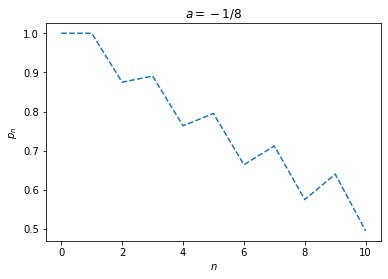

In [123]:
nvals = np.linspace (0, 10, 11)

pnval0 = [fib_general(nval, 1, 1, -1/8) for nval in nvals]

plt.plot (nvals, pnval0, ls = '--')
plt.xlabel('$n$')
plt.ylabel('$p_{n} $')
plt.title('$a = -1/8$')


Text(0.5, 1.0, '$a = 2$')

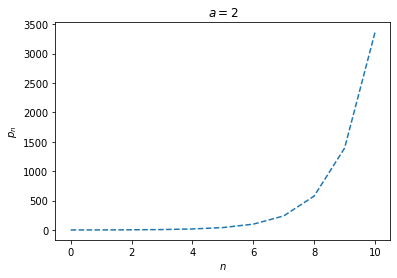

In [110]:
nvals = np.linspace (0, 10, 11)

pnval2 = [fib_general(nval, 1, 1, 2) for nval in nvals]

plt.plot (nvals, pnval2, ls = '--')
plt.xlabel('$n$')
plt.ylabel('$p_{n} $')
plt.title('$a = 2$')

Text(0.5, 1.0, '$a = 5$')

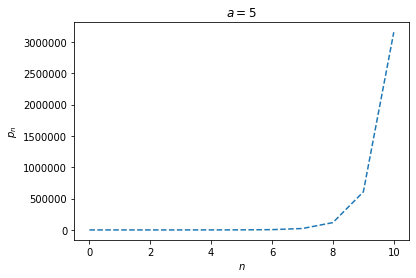

In [117]:
nvals = np.linspace (0, 10, 11)

pnval5 = [fib_general(nval, 1, 1, 5) for nval in nvals]

plt.plot (nvals, pnval5, ls = '--')
plt.xlabel('$n$')
plt.ylabel('$p_{n} $')
plt.title('$a = 5$')

Text(0.5, 1.0, '$a = -1/2$')

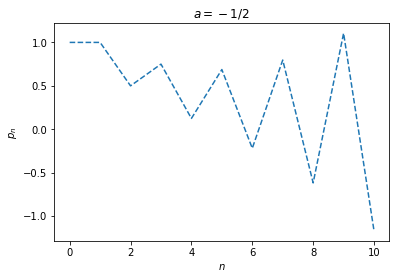

In [116]:
nvals = np.linspace (0, 10, 11)

pnval = [fib_general(nval, 1, 1, -1/2) for nval in nvals]

plt.plot (nvals, pnval, ls = '--')

plt.xlabel('$n$')
plt.ylabel('$p_{n} $')
plt.title('$a = -1/2$')

Because of our first range, we had Lambda Plus and Minus be less than 1, so we had a very small and decreasing sequence, decreasing due to the negative avals.

Whereas, when we increased the range, the Lambda Plus and Minus became greater than 1, the sequence would become bigger and increasing.

With our a = -1/2, our sequence values become negative after some nvals